##PDF of Two-moon distribution

For the upper moon, $y=0$, the distribution $p(\mathbf{x}|\mathbf{y}=0)$ is given as
$$\frac{1}{2\pi^2\sigma^2} \exp\left(-\frac{x_1^2 + x_2^2 + 1}{2\sigma^2}\right) \int_0^{\pi} \exp\left(\frac{x_1\cos(t) + x_2\sin(t)}{\sigma^2}\right) dt$$

And for the lower moon, $\mathbf{y}=1$, the distribution $p(\mathbf{x}|\mathbf{y}=1)$ is given as
$$\frac{1}{2\pi^2\sigma^2} \exp\left(-\frac{(x_1 - 1)^2 + (x_2 - 0.5)^2 + 1}{2\sigma^2}\right) \int_0^{\pi} \exp\left(\frac{-(x_1 - 1)\cos(t) - (x_2 - 0.5)\sin(t)}{\sigma^2}\right) dt$$

Moreover, $P(\mathbf{y}=0) = P(\mathbf{y}=1) = 1/2$

In [3]:
from pdf import moon_upper, moon_lower

print(moon_upper(0.5, -0.5), moon_lower(0.5, -0.5))

0.005600651073462778 0.37437354005791396


###Plot the distribution between $x_1\in(-3, 3), x_2\in(-3,3)$. We choose either a 100-interval or 200-interval plot.

In [4]:
import numpy as np

x1_values = np.linspace(-3, 3, 200)
x2_values = np.linspace(-3, 3, 200)
_d = np.diff(x1_values)[0]

X1, X2 = np.meshgrid(x1_values, x2_values)
sigma = 0.3  # Fixed sigma value

Z_p0 = moon_upper(X1, X2, sigma) * 0.5
Z_p1 = moon_lower(X1, X2, sigma) * 0.5


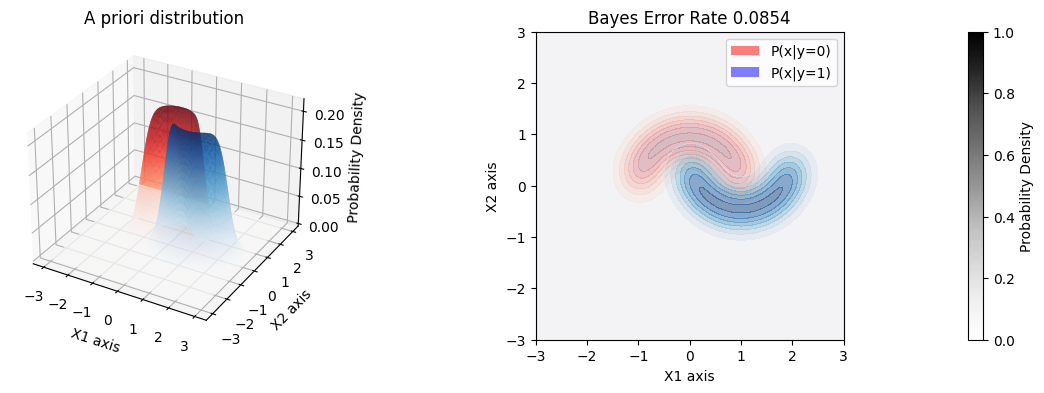

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 4))

# Subplot 1: 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf_Z1 = ax1.plot_surface(X1, X2, Z_p0, alpha=0.7, cmap='Reds', edgecolor='none', rcount=200, ccount=200)
surf_Z2 = ax1.plot_surface(X1, X2, Z_p1, alpha=0.7, cmap='Blues', edgecolor='none', rcount=200, ccount=200)
ax1.set_xlabel('X1 axis')
ax1.set_ylabel('X2 axis')
ax1.set_zlabel('Probability Density')
ax1.set_title('A priori distribution')

plt.subplots_adjust(wspace=0.3)

# Subplot 2: Contour plot
ax2 = fig.add_subplot(122)
ax2.set_box_aspect(1)
contour_Z1 = ax2.contourf(X1, X2, Z_p0, alpha=0.5, cmap='Reds')
contour_Z2 = ax2.contourf(X1, X2, Z_p1, alpha=0.5, cmap='Blues')
ax2.set_xlabel('X1 axis')
ax2.set_ylabel('X2 axis')

beta = 1 - np.maximum(Z_p0, Z_p1).sum() * _d ** 2
ax2.set_title(f'Bayes Error Rate {beta:.4f}')

legend_handles = [plt.Rectangle((0, 0), 1, 1, fc='red', alpha=0.5), plt.Rectangle((0, 0), 1, 1, fc='blue', alpha=0.5)]
legend_labels = ['P(x|y=0)', 'P(x|y=1)']
ax2.legend(legend_handles, legend_labels)

sm = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []
cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation='vertical', pad=0.1)
cbar.set_label('Probability Density')

plt.show()

/tmp/ipykernel_312201/2584669227.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


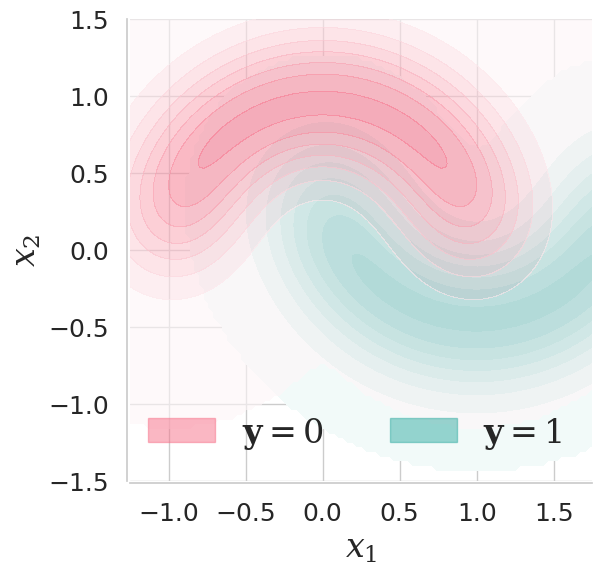

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

sns.set(style="whitegrid")

from matplotlib.colors import LinearSegmentedColormap
palette = sns.color_palette("husl", 2)
custom_cmap1 = LinearSegmentedColormap.from_list("custom_cmap1", [(1, 1, 1), palette[0]], N=256)
custom_cmap2 = LinearSegmentedColormap.from_list("custom_cmap2", [(1, 1, 1), palette[1]], N=256)


fig, ax2 = plt.subplots(figsize=(6,6))

ax2.set_box_aspect(1)

contour_Z2 = ax2.contourf(X1, X2, np.ma.masked_where((Z_p1<1e-3), Z_p1), alpha=1, cmap=custom_cmap2)
contour_Z1 = ax2.contourf(X1, X2, np.ma.masked_where(Z_p0<1e-5, Z_p0), alpha=0.6, cmap=custom_cmap1)

ax2.set_xlabel(r'$\mathit{x}_1$', fontsize = 24)
ax2.set_ylabel(r'$\mathit{x}_2$', fontsize = 24)

_d = np.diff(X1, axis=0)[0, 0]  # Assuming regular grid spacing in X1
# Removing the top and right spines
sns.despine(ax=ax2, offset=2)

legend_handles = [plt.Rectangle((0, 0), 1, 1, color=palette[0], alpha=0.5), plt.Rectangle((0, 0), 1, 1, color=palette[1], alpha=0.5)]

legend_labels = [r'$\mathbf{y} = 0$',r'$\mathbf{y} = 1$']
ax2.legend(legend_handles, legend_labels, fontsize=24, loc='lower right',ncol=2)
ax2.set_xlim(-1.25, 1.75)
ax2.set_ylim(-1.5, 1.5)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig("moons.pdf", bbox_inches='tight')
plt.show()


###Compute integral of PDF within $x_1\in(-3, 3), x_2\in(-3,3)$

In [ ]:
# from scipy.integrate import dblquad
from integrate import dblquad_

result, error = dblquad_(moon_upper, -3, 3, lambda x: -3, lambda x: 3)

print("Result of the double integration:", result)
print("Estimated error:", error)


Result of the double integration: 0.999999999995628
Estimated error: 3.2879075897452015e-08


##Convolve PDF of Two-moon distribution

We convolve the PDF of each (moon) distribution with a rectangular function that represents the vicinity. The rectangular function is defined as
$$v(x_1, x_2) = \begin{cases} \frac{1}{4\epsilon^2}, & \text{if } -\epsilon \leq x_1 \leq \epsilon \text{ and } -\epsilon \leq x_2 \leq \epsilon \\ 0, & \text{otherwise} \end{cases}$$
where $\epsilon$ is the threshold of this $L^\infty$-norm, e.g., 0.1.


For the upper moon, $\mathbf{y}=0$, the distribution after convolution is denoted as $q(\mathbf{x}|\mathbf{y}=0)$ and defined as
$$q(\mathbf{x}|\mathbf{y}=0)=(p(\mathbf{x}|\mathbf{y}=0) * v)(x_1, x_2) = \int_{x_1-\epsilon}^{x_1+\epsilon} \int_{x_2-\epsilon}^{x_2+\epsilon} p(\mathbf{x}=(u, v)|\mathbf{y}=0) \cdot \frac{1}{4\epsilon^2} \, du \, dv $$

Specifically, its calculation is as follows
$$ \frac{1}{4\epsilon^2} \cdot \frac{1}{2\pi^2\sigma^2} \int_{x_1-\epsilon}^{x_1+\epsilon} \int_{x_2-\epsilon}^{x_2+\epsilon} \exp\left(-\frac{u^2 + v^2 + 1}{2\sigma^2}\right) \left[ \int_0^{\pi} \exp\left(\frac{u\cos(t) + v\sin(t)}{\sigma^2}\right) dt \right] du \, dv $$

And for the lower moon, $\mathbf{y}=1$, the distribution after convolution is denoted as $q(\mathbf{x}|\mathbf{y}=1)$ and defined as $(p(\mathbf{x}|\mathbf{y}=1) * v)(x_1, x_2) $. Specifically, its calculation is as follows

$$\frac{1}{4\epsilon^2} \cdot \frac{1}{2\pi^2\sigma^2} \int_{x_1-\epsilon}^{x_1+\epsilon} \int_{x_2-\epsilon}^{x_2+\epsilon} \exp\left(-\frac{(u - 1)^2 + (v - 0.5)^2 + 1}{2\sigma^2}\right) \left[ \int_0^{\pi} \exp\left(\frac{-(u - 1)\cos(t) - (v - 0.5)\sin(t)}{\sigma^2}\right) dt \right] du \, dv $$

These distribution after convolution represents a triple integral whose close forms are hard to calculate. To solve it numerically, we can use numerical integration techniques such as `tplquad` in Python's `scipy.integrate` module.




###Plot the distribution after convolution between $x_1\in(-3, 3), x_2\in(-3,3)$. We choose either a 100-interval or 200-interval plot.

In [ ]:
import importlib
import pdf
importlib.reload(pdf)

<module 'pdf' from '/home/azureuser/working/irreducible-robustness-error/pdf.py'>

In [5]:
from pdf import moon_upper_conv, moon_lower_conv
print(moon_upper_conv(0.5, -0.5), moon_lower_conv(0.5, -0.5))

0.006898811547625846 0.36194218342609336


In [7]:
epsilon = 0.15

Z_q0 = moon_upper_conv(X1, X2, sigma, epsilon) * 0.5
Z_q1 = moon_lower_conv(X1, X2, sigma, epsilon) * 0.5

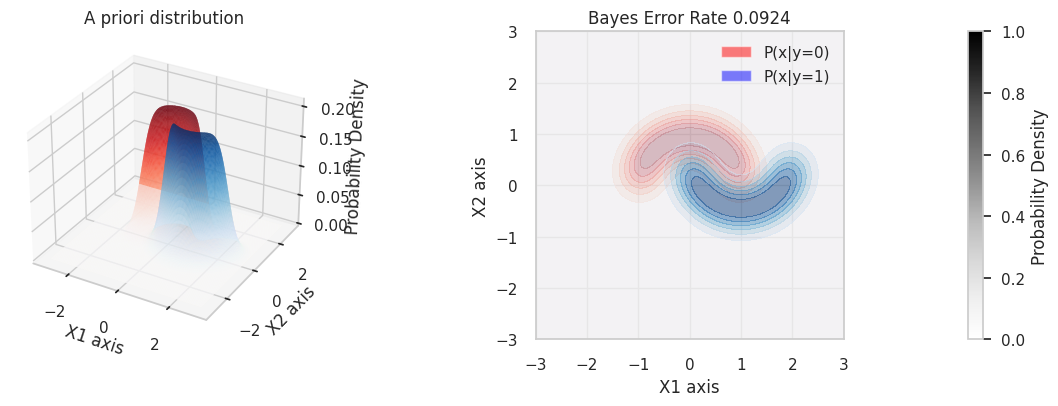

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(16, 4))

# Subplot 1: 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf_Z1 = ax1.plot_surface(X1, X2, Z_q0, alpha=0.7, cmap='Reds', edgecolor='none', rcount=200, ccount=200)
surf_Z2 = ax1.plot_surface(X1, X2, Z_q1, alpha=0.7, cmap='Blues', edgecolor='none', rcount=200, ccount=200)
ax1.set_xlabel('X1 axis')
ax1.set_ylabel('X2 axis')
ax1.set_zlabel('Probability Density')
ax1.set_title('A priori distribution')

plt.subplots_adjust(wspace=0.3)

# Subplot 2: Contour plot
ax2 = fig.add_subplot(122)
ax2.set_box_aspect(1)
contour_Z1 = ax2.contourf(X1, X2, Z_q0, alpha=0.5, cmap='Reds')
contour_Z2 = ax2.contourf(X1, X2, Z_q1, alpha=0.5, cmap='Blues')
ax2.set_xlabel('X1 axis')
ax2.set_ylabel('X2 axis')

beta = 1 - np.maximum(Z_q0, Z_q1).sum() * _d ** 2
ax2.set_title(f'Bayes Error Rate {beta:.4f}')

legend_handles = [plt.Rectangle((0, 0), 1, 1, fc='red', alpha=0.5), plt.Rectangle((0, 0), 1, 1, fc='blue', alpha=0.5)]
legend_labels = ['P(x|y=0)', 'P(x|y=1)']
ax2.legend(legend_handles, legend_labels)

sm = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []  # Fake data for ScalarMappable.
cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation='vertical', pad=0.1)
cbar.set_label('Probability Density')

plt.show()

/tmp/ipykernel_339606/1331893360.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


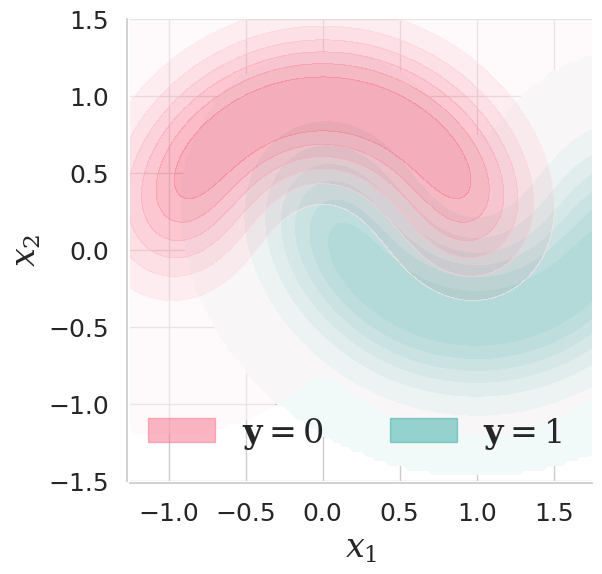

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

sns.set(style="whitegrid")

from matplotlib.colors import LinearSegmentedColormap
palette = sns.color_palette("husl", 2)
custom_cmap1 = LinearSegmentedColormap.from_list("custom_cmap1", [(1, 1, 1), palette[0]], N=256)
custom_cmap2 = LinearSegmentedColormap.from_list("custom_cmap2", [(1, 1, 1), palette[1]], N=256)


fig, ax2 = plt.subplots(figsize=(6,6))

ax2.set_box_aspect(1)

contour_Z2 = ax2.contourf(X1, X2, np.ma.masked_where((Z_q1<1e-3), Z_q1), alpha=1, cmap=custom_cmap2)
contour_Z1 = ax2.contourf(X1, X2, np.ma.masked_where(Z_q0<1e-5, Z_q0), alpha=0.6, cmap=custom_cmap1)

ax2.set_xlabel(r'$\mathit{x}_1$', fontsize = 24)
ax2.set_ylabel(r'$\mathit{x}_2$', fontsize = 24)

sns.despine(ax=ax2, offset=2)

legend_handles = [plt.Rectangle((0, 0), 1, 1, color=palette[0], alpha=0.5), plt.Rectangle((0, 0), 1, 1, color=palette[1], alpha=0.5)]

legend_labels = [r'$\mathbf{y} = 0$',r'$\mathbf{y} = 1$']
ax2.legend(legend_handles, legend_labels, fontsize=24, loc='lower right',ncol=2)
ax2.set_xlim(-1.25, 1.75)
ax2.set_ylim(-1.5, 1.5)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig("moons_convolved.pdf", bbox_inches='tight')
plt.show()


###Plot the histogram of PDF between $x_1\in(-3, 3), x_2\in(-3,3)$.

We can see that more than 90% of posteriori probability are less than 0.01, which suggests that no matter how they behave, their contribution can be negligible.

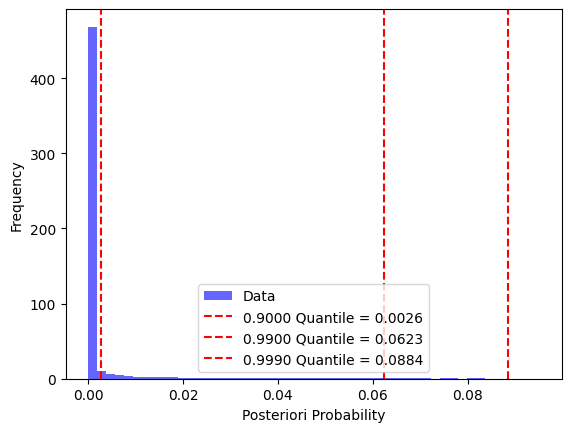

In [8]:
data = np.minimum(Z_q0, Z_q1).flatten()
plt.hist(data, bins=50, density=True, alpha=0.6, color='b', label='Data')

quants = [0.90, 0.99, 0.999]
for quant, quant_ in zip(quants, np.quantile(data, quants)):
    plt.axvline(quant_, color='r', linestyle='--', label=f'{quant:.4f} Quantile = {quant_:.4f}')
plt.xlabel('Posteriori Probability')
plt.ylabel('Frequency')

plt.legend()

##Estimate PDF using KDE

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from scipy.stats import gaussian_kde

# Generate the two-moon dataset (1M sample needed)
n = 1000000
X, y = make_moons(n_samples=n, noise=0.3, random_state=42)

kde_class0 = gaussian_kde(X[y == 0].T, bw_method=0.075)
kde_class1 = gaussian_kde(X[y == 1].T, bw_method=0.075)

vectorized_kde_class0 = np.vectorize(lambda x1, x2: kde_class0([x1, x2]))
vectorized_kde_class1 = np.vectorize(lambda x1, x2: kde_class1([x1, x2]))

W_p0 = vectorized_kde_class0(X1, X2) * 0.5
W_p1 = vectorized_kde_class1(X1, X2) * 0.5

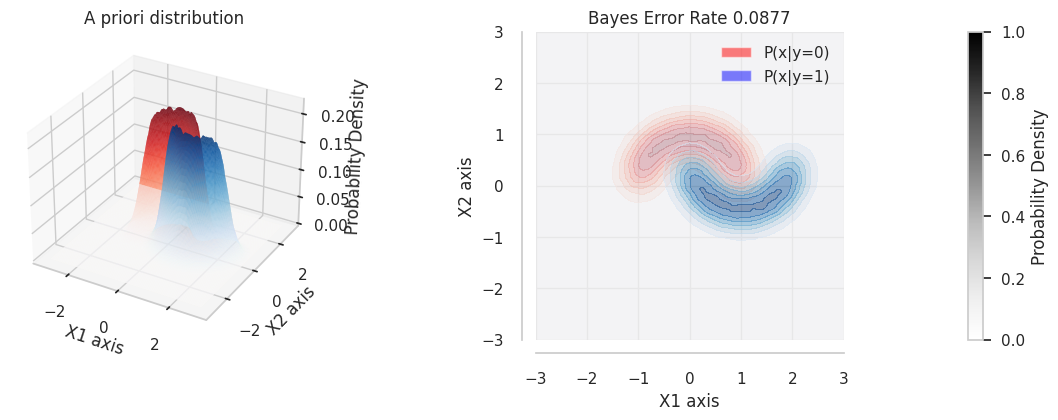

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

# Creating a figure with two subplots
fig = plt.figure(figsize=(16, 4))

# Subplot 1: 3D surface plot

ax1 = fig.add_subplot(121, projection='3d')
surf_Z1 = ax1.plot_surface(X1, X2, W_p0, alpha=0.7, cmap='Reds', edgecolor='none', rcount=200, ccount=200)
surf_Z2 = ax1.plot_surface(X1, X2, W_p1, alpha=0.7, cmap='Blues', edgecolor='none', rcount=200, ccount=200)
ax1.set_xlabel('X1 axis')
ax1.set_ylabel('X2 axis')
ax1.set_zlabel('Probability Density')
ax1.set_title('A priori distribution')

plt.subplots_adjust(wspace=0.3)

# Subplot 2: Contour plot
ax2 = fig.add_subplot(122)
ax2.set_box_aspect(1)
contour_Z1 = ax2.contourf(X1, X2, W_p0, alpha=0.5, cmap='Reds')
contour_Z2 = ax2.contourf(X1, X2, W_p1, alpha=0.5, cmap='Blues')
ax2.set_xlabel('X1 axis')
ax2.set_ylabel('X2 axis')

beta = 1 - np.maximum(W_p0, W_p1).sum() * _d ** 2
ax2.set_title(f'Bayes Error Rate {beta:.4f}')

sns.despine(ax=ax2, offset=10)

# Create a legend
legend_handles = [plt.Rectangle((0, 0), 1, 1, fc='red', alpha=0.5), plt.Rectangle((0, 0), 1, 1, fc='blue', alpha=0.5)]
legend_labels = ['P(x|y=0)', 'P(x|y=1)']
ax2.legend(legend_handles, legend_labels)

# Creating a single colorbar in grayscale for both plots
sm = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []  # Fake data for ScalarMappable.
cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation='vertical', pad=0.1)
cbar.set_label('Probability Density')

plt.show()

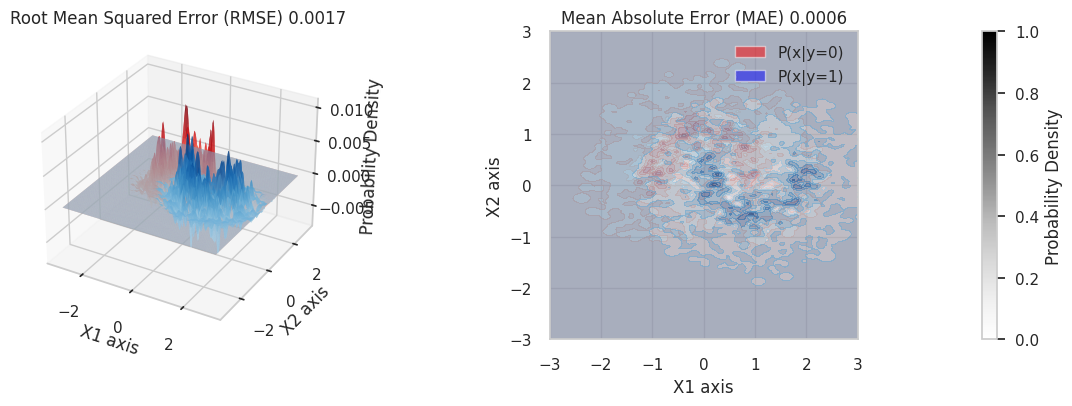

In [ ]:
import matplotlib.pyplot as plt

import numpy as np

fig = plt.figure(figsize=(16, 4))

# Subplot 1: 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf_Z1 = ax1.plot_surface(X1, X2, Z_p0 - W_p0, alpha=0.7, cmap='Reds', edgecolor='none', rcount=200, ccount=200)
surf_Z2 = ax1.plot_surface(X1, X2, Z_p1 - W_p1, alpha=0.7, cmap='Blues', edgecolor='none', rcount=200, ccount=200)
ax1.set_xlabel('X1 axis')
ax1.set_ylabel('X2 axis')
ax1.set_zlabel('Probability Density')
ax1.set_title(f'Root Mean Squared Error (RMSE) {np.sqrt(np.mean((Z_p0 - W_p0)**2)) + np.sqrt(np.mean((Z_p1 - W_p1)**2)):.4f}')


plt.subplots_adjust(wspace=0.3)

# Subplot 2: Contour plot
ax2 = fig.add_subplot(122)
ax2.set_box_aspect(1)
contour_Z1 = ax2.contourf(X1, X2, Z_p0 - W_p0, alpha=0.5, cmap='Reds')
contour_Z2 = ax2.contourf(X1, X2, Z_p1 - W_p1, alpha=0.5, cmap='Blues')
ax2.set_xlabel('X1 axis')
ax2.set_ylabel('X2 axis')

beta = 1 - np.maximum(W_p0, W_p1).sum() * _d ** 2
ax2.set_title(f'Mean Absolute Error (MAE) {np.mean(np.abs(Z_p0 - W_p0)) + np.mean(np.abs(Z_p1 - W_p1)):.4f}')

legend_handles = [plt.Rectangle((0, 0), 1, 1, fc='red', alpha=0.5), plt.Rectangle((0, 0), 1, 1, fc='blue', alpha=0.5)]
legend_labels = ['P(x|y=0)', 'P(x|y=1)']
ax2.legend(legend_handles, legend_labels)

sm = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []
cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation='vertical', pad=0.1)
cbar.set_label('Probability Density')

plt.show()

###Check the integral of estimated PDF (Wow, so hard to compute!)

Result of the double integration: 1.0000000000119718

Estimated error: 1.4881258707658211e-08

In [ ]:
# from scipy.integrate import dblquad

# result, error = dblquad(lambda x1, x2: kde_class0([x1, x2]), -3, 3, lambda x: -3, lambda x: 3)

# print("Result of the double integration:", result)
# print("Estimated error:", error)


###Resample from the estimated PDF

This is not a good idea, because the estimated distribution tends to be flatter than the original.

<Figure size 800x600 with 0 Axes>

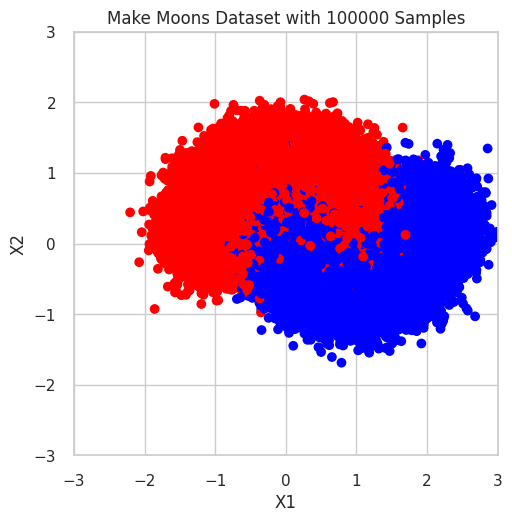

In [ ]:
from IPython.display import clear_output

plt.figure(figsize=(8, 6))

fig, ax = plt.subplots()

n = 50000
X_ = np.concatenate([kde_class0.resample(n).T, kde_class1.resample(n).T], axis=0)
y_ = np.array([0] * n + [1] * n)

shuffled_indices = np.random.permutation(len(y_))
X_, y_ = X_[shuffled_indices], y_[shuffled_indices]

ax.scatter(X_[:, 0], X_[:, 1], c=['red' if label == 0 else 'blue' for label in y_], alpha = 1)

plt.title(f"Make Moons Dataset with {len(y_)} Samples")
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_box_aspect(1)
plt.show()


##Convolve the estimated PDF with vicinity.

In [11]:
# @title Vicinity

import numpy as np

def v_vectorized(x1, x2, epsilon=0.15):
    return np.where(
        (x1 >= -epsilon) & (x1 <= epsilon) & (x2 >= -epsilon) & (x2 <= epsilon),
        1, # / (4 * epsilon ** 2),
        0
    )


In [12]:
# @title L2 Vicinity
import numpy as np

def v_vectorized_l2(x1, x2, epsilon=0.1):
    return np.where(
        np.sqrt(x1 ** 2 + x2 ** 2) <= epsilon,
        1, # The value to return if the condition is True
        0  # The value to return if the condition is False
    )


In [14]:
import numpy as np
from scipy.signal import fftconvolve
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white", palette="muted", color_codes=True)

V = v_vectorized(X1, X2).round().astype(int)
W_q0 = fftconvolve(Z_p0, V, mode='same') / V.sum()
W_q1 = fftconvolve(Z_p1, V, mode='same') / V.sum()

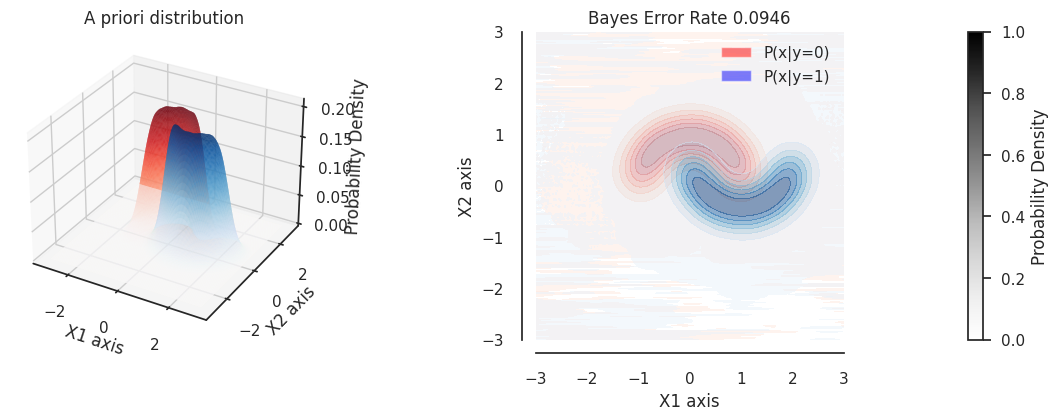

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

fig = plt.figure(figsize=(16, 4))

# Subplot 1: 3D surface plot

ax1 = fig.add_subplot(121, projection='3d')
surf_Z1 = ax1.plot_surface(X1, X2, W_q0, alpha=0.7, cmap='Reds', edgecolor='none', rcount=200, ccount=200)
surf_Z2 = ax1.plot_surface(X1, X2, W_q1, alpha=0.7, cmap='Blues', edgecolor='none', rcount=200, ccount=200)
ax1.set_xlabel('X1 axis')
ax1.set_ylabel('X2 axis')
ax1.set_zlabel('Probability Density')
ax1.set_title('A priori distribution')

plt.subplots_adjust(wspace=0.3)

# Subplot 2: Contour plot
ax2 = fig.add_subplot(122)
ax2.set_box_aspect(1)
contour_Z1 = ax2.contourf(X1, X2, W_q0, alpha=0.5, cmap='Reds')
contour_Z2 = ax2.contourf(X1, X2, W_q1, alpha=0.5, cmap='Blues')
ax2.set_xlabel('X1 axis')
ax2.set_ylabel('X2 axis')

beta = 1 - np.maximum(W_q0, W_q1).sum() * _d ** 2
ax2.set_title(f'Bayes Error Rate {beta:.4f}')

sns.despine(ax=ax2, offset=10)

legend_handles = [plt.Rectangle((0, 0), 1, 1, fc='red', alpha=0.5), plt.Rectangle((0, 0), 1, 1, fc='blue', alpha=0.5)]
legend_labels = ['P(x|y=0)', 'P(x|y=1)']
ax2.legend(legend_handles, legend_labels)

sm = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []
cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation='vertical', pad=0.1)
cbar.set_label('Probability Density')

plt.show()

###Irreducible robustness error

Calculate $\zeta_D$, around 19.6%

Note that we don't calculate $\zeta_D^\dagger$ here because it is very close to 1

In [76]:
from irreducible import zeta_
zeta_D = []

for e in np.linspace(0, 2, 33):
    V = v_vectorized_l2(X1, X2, e).round().astype(int)
    zeta_D.append(zeta_((Z_p0, Z_p1), V, x1_values, x2_values))

7896


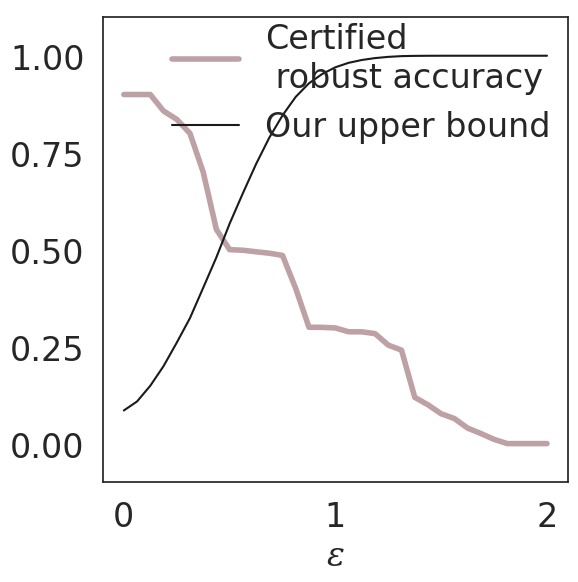

In [81]:
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(np.linspace(0, 2, 33), np.array(new_list), label='Certified\n robust accuracy', color='#BEA1A5', linewidth=4)
plt.plot(np.linspace(0, 2, 33), np.array(zeta_D), label='Our upper bound', color='k')

plt.xlabel(r'$\epsilon$', fontsize=24)
# plt.ylabel('Robustness')
ax.legend( fontsize=24, loc=(0.12,0.7),ncol=1)
ax.tick_params(axis='both', which='major', labelsize=24)

ax.set_box_aspect(1)
ax.set_xlim(-0.1, 2.1)
ax.set_ylim(-0.1, 1.1)

fig.tight_layout()

ind = np.random.randint(0,9999)
plt.savefig(f"epsilon_moons_l2.pdf", bbox_inches='tight')
print(ind)

plt.show()

##Train simpler classifier with sklearn Two-moon dataset (standard training)

In [84]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset


In [85]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=20000, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1667, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


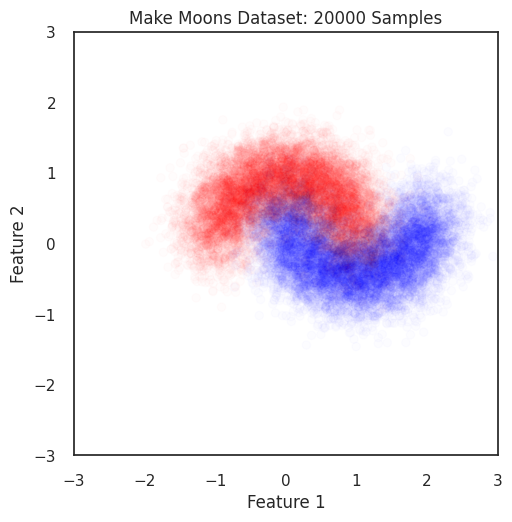

In [86]:
import matplotlib.pyplot as plt
from IPython.display import clear_output


plt.figure(figsize=(8, 6))

update_interval = len(y) // 10  # Number of points to add in each update

for i in range(0, len(y) + 1, update_interval):
    clear_output(wait=True)
    # Ensure the last iteration includes all data points
    if i + update_interval > len(y):
        i = len(y)

    colors = ['red' if label == 0 else 'blue' for label in y[:i]]
    plt.scatter(X[:i, 0], X[:i, 1], c=colors, alpha = 1e-2)
    plt.gca().set_box_aspect(1)

    plt.title(f"Make Moons Dataset: {i} Samples")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.show()


In [87]:
# # Neural network model
# class SimpleNN(nn.Module):
#     def __init__(self):
#         super(SimpleNN, self).__init__()
#         self.fc = nn.Sequential(
#             nn.Linear(2, 10),
#             nn.ReLU(),
#             nn.Linear(10, 1),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         return self.fc(x)


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 10)  # 2 input features, 10 neurons in first hidden layer
        self.fc2 = nn.Linear(10, 10) # 10 neurons in second hidden layer
        self.fc3 = nn.Linear(10, 1)  # 1 output neuron

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

model = SimpleNN()


In [88]:
criterion = nn.BCELoss() # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)


/home/azureuser/.conda/envs/rh1/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [89]:
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)

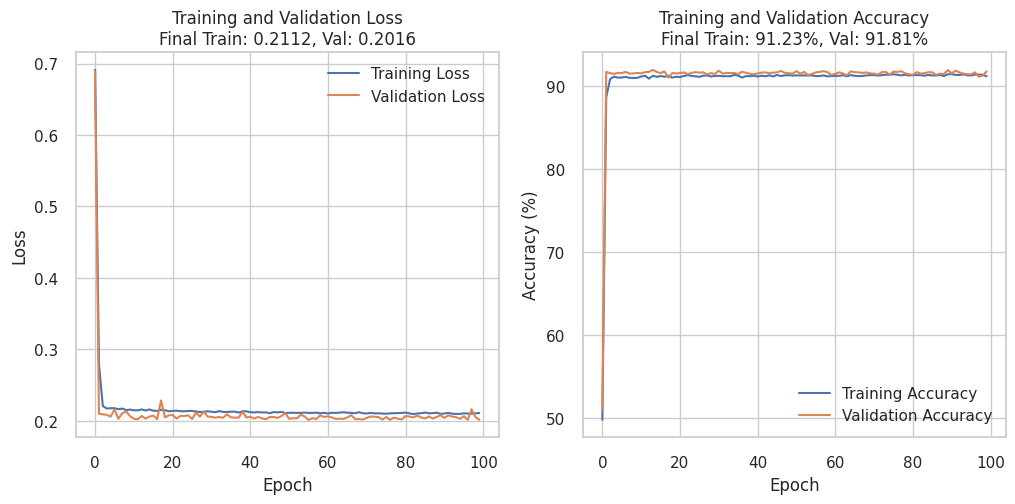

In [ ]:
import matplotlib.pyplot as plt

# Initialize lists to track loss and accuracy
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

epochs = 100
for epoch in range(epochs):
    # Training
    model.train()
    total_loss = 0
    correct = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        if epoch > 0:
            loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += (outputs.round() == y_batch).float().sum()
    train_losses.append(total_loss / len(train_loader))
    train_accuracies.append(100 * correct / len(train_loader.dataset))

    # Validation
    model.eval()
    val_loss = 0
    correct = 0
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test).item()
        val_losses.append(val_loss)
        correct = (val_outputs.round() == y_test).float().sum()
        val_accuracies.append(100 * correct / len(X_test))

# Plotting
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title(f'Training and Validation Loss\nFinal Train: {train_losses[-1]:.4f}, Val: {val_losses[-1]:.4f}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title(f'Training and Validation Accuracy\nFinal Train: {train_accuracies[-1]:.2f}%, Val: {val_accuracies[-1]:.2f}%')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()


###Compute integral of accuracy, around 91.246%
maybe we need to integrate beyond $\pm$3

In [ ]:
# #@title Ordinary version

# import numpy as np
# from scipy.integrate import dblquad

# def accurate(x1, x2):
#     with torch.no_grad():
#         pred = model(torch.tensor([x1, x2])).round().item()
#     return (p0(x1, x2) * (1 - pred) + p1(x1, x2) * pred) / 2

# # Perform the double integration
# expected_accuracy, error = dblquad(accurate, -3, 3, lambda x: -3, lambda x: 3)

# print("Result of the double integration:", result)
# print("Estimated error:", error)


In [ ]:
# # @title Faster version

# from scipy.integrate import dblquad
# from joblib import Parallel, delayed
# import numpy as np


# def accurate(x1, x2):
#     with torch.no_grad():
#         pred = model(torch.tensor([x1, x2])).round().item()
#     return (p0(x1, x2) * (1 - pred) + p1(x1, x2) * pred) / 2

# num_jobs = 16
# x2_ranges = np.stack((np.linspace(-3, 3, num_jobs + 1)[:-1], np.linspace(-3, 3, num_jobs + 1)[1:]), axis=-1)

# # Perform the double integration in parallel
# # results = Parallel(n_jobs=num_jobs, backend='multiprocessing')(delayed(dblquad)(accurate, x2_range[0], x2_range[1], lambda x: x1_lower, lambda x: x1_upper) for x2_range in x2_ranges)

# # Perform the double integration in parallel using 'multiprocessing'
# def dblquad_wrapper(x2_range):
#     return dblquad(accurate, x2_range[0], x2_range[1], lambda x: -3, lambda x: 3)

# results = Parallel(n_jobs=num_jobs, backend='multiprocessing')(delayed(dblquad_wrapper)(r) for r in x2_ranges)


# # Combine the results
# expected_accuracy = sum(result[0] for result in results)

# print("Result of the double integration:", expected_accuracy)
# # print("Estimated error:", error)



###Compute convergence of accuracy when sample size grows

This value should converge to the accuracy in integral form above

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")

correct__ = []
# correct_certified__ = []

n = 100
for k in range(10000):
    X_, y_ = make_moons(n_samples=n, noise=0.3)
    X__ = torch.tensor(X_, dtype=torch.float32)
    y__ = torch.tensor(y_, dtype=torch.float32).view(-1, 1)

    with torch.no_grad():
        test_outputs = model(X__)
        correct_ = (test_outputs.round() == y__).float().sum()

        # X__bounded = BoundedTensor(X_, ptb)
        # lb, ub = model.compute_bounds(x=(X__bounded,), method="CROWN")
        # correct_certified_ = ((y_ == 1) & (lb > threshold)).sum() + ((y_ == 0) & (ub < threshold)).sum()

    correct__.append(correct_)
    # correct_certified__.append(correct_certified_)

avg_correct__ = np.cumsum(correct__) / np.arange(1, len(correct__) + 1) / n
# avg_correct_certified__ = np.cumsum(correct_certified__) / np.arange(1, len(correct_certified__) + 1)

# plt.figure(figsize=(10, 6))
# sns.lineplot(x=np.log(np.arange(1, len(correct__) + 1) * n), y=avg_correct__, marker='o', linestyle='-', color='skyblue')
# # sns.lineplot(x=np.log(np.arange(1, len(correct_certified__) + 1) * 500), y=avg_correct_certified__, marker='o', linestyle='--', color='orange')

# # Label the axes
# plt.xlabel('Logarithmic sample size')
# plt.ylabel('Average accuracy / certified accuracy')
# plt.legend(['Accuracy', 'Certified accuracy'])
# plt.title('Average Accuracy and Certified Accuracy Over Logarithmic Sample Size')

# print(avg_correct__[-1])
# # print(avg_correct_certified__[-1])
# plt.show()


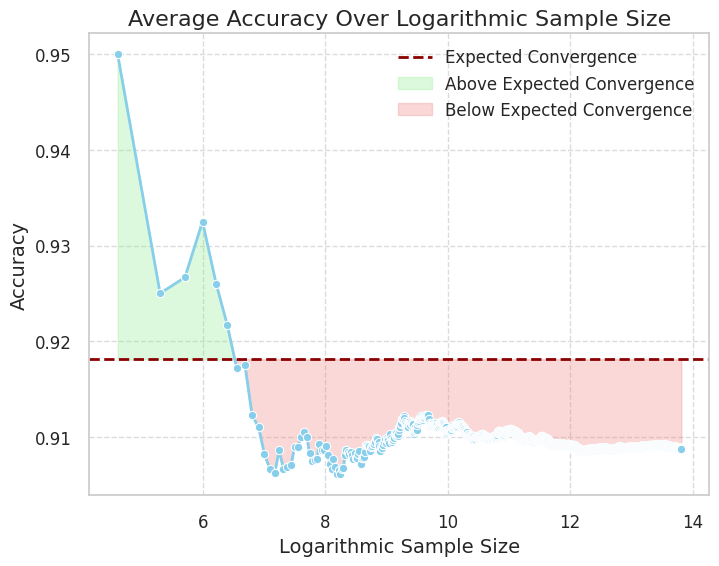

In [ ]:
import numpy as np
import torch
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style and color palette
sns.set(style="whitegrid")
sns.set_palette("deep")

avg_correct__ = np.cumsum(correct__) / np.arange(1, len(correct__) + 1) / n
# avg_correct_certified__ = np.cumsum(correct_certified__) / np.arange(1, len(correct_certified__) + 1)

# Create a fancy line plot with Seaborn for average accuracy
plt.figure(figsize=(8, 6))

# Main line plot
sns.lineplot(x=np.log(np.arange(1, len(correct__) + 1) * n), y=avg_correct__, marker='o', linestyle='-', color='skyblue', linewidth=2)

# # Create a line plot with Seaborn for certified accuracy (uncomment if needed)
# sns.lineplot(x=np.log(np.arange(1, len(correct_certified__) + 1) * 500), y=avg_correct_certified__, marker='o', linestyle='--', color='orange', linewidth=2)
expected_accuracy = 0.9181
plt.axhline(y=expected_accuracy, color='darkred', linestyle='--', label='Expected Convergence', linewidth=2)

# Shade the regions where avg_correct__ is temporarily higher or lower than the expected convergence
plt.fill_between(x=np.log(np.arange(1, len(correct__) + 1) * n),
                 y1=avg_correct__, y2=expected_accuracy,
                 where=avg_correct__ > expected_accuracy, interpolate=True,
                 color='lightgreen', alpha=0.3, label='Above Expected Convergence')

plt.fill_between(x=np.log(np.arange(1, len(correct__) + 1) * n),
                 y1=avg_correct__, y2=expected_accuracy,
                 where=avg_correct__ < expected_accuracy, interpolate=True,
                 color='lightcoral', alpha=0.3, label='Below Expected Convergence')

# Additional styling
plt.title('Average Accuracy Over Logarithmic Sample Size', fontsize=16)
plt.xlabel('Logarithmic Sample Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()


9383


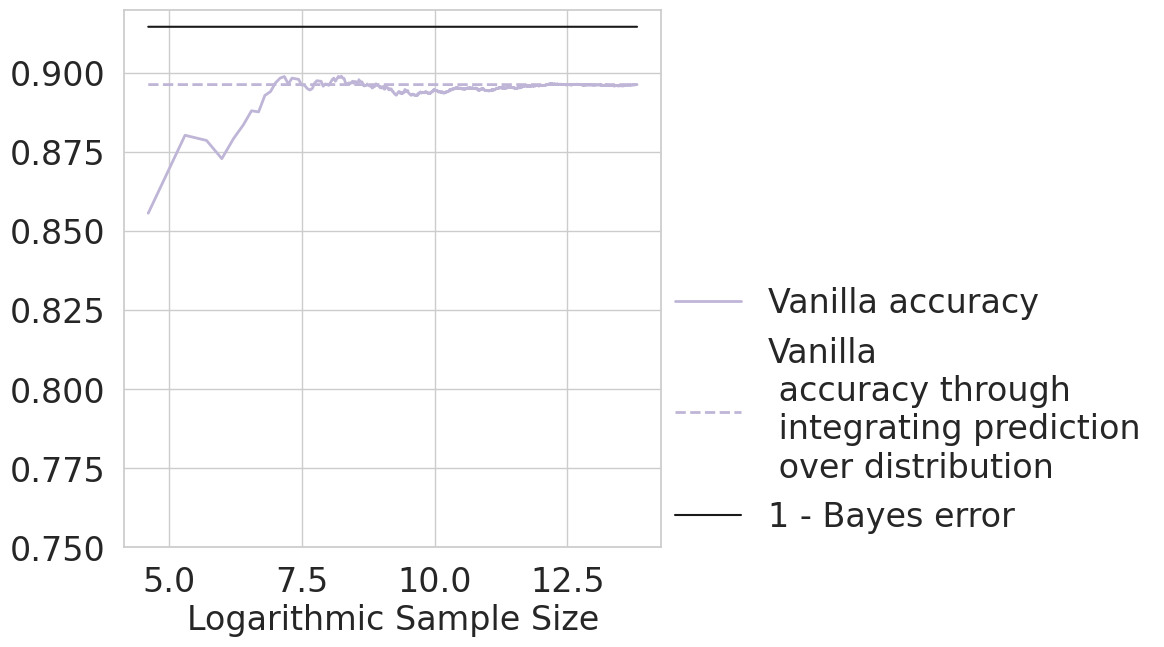

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.plot(np.log(np.arange(1, len(correct__) + 1) * n), avg_correct__00, label='Vanilla accuracy', color='#BFB5D7', linewidth=2)
plt.plot(np.log(np.arange(1, len(correct__) + 1) * n), distribution_correct, '--', label='Vanilla\n accuracy through\n integrating prediction\n over distribution', color='#BFB5D7', linewidth=2)
plt.plot(np.log(np.arange(1, len(correct__) + 1) * n), _beta, label='1 - Bayes error', color='k')

plt.xlabel(r'Logarithmic Sample Size', fontsize=24)
ax.legend( fontsize=24, loc=(1,0.),ncol=1)
ax.tick_params(axis='both', which='major', labelsize=24)

ax.set_box_aspect(1)
ax.set_ylim(0.75, 0.92)

fig.tight_layout()

ind = np.random.randint(0,9999)
plt.savefig(f"convergence_1.pdf", bbox_inches='tight')
print(ind)

plt.show()

5869


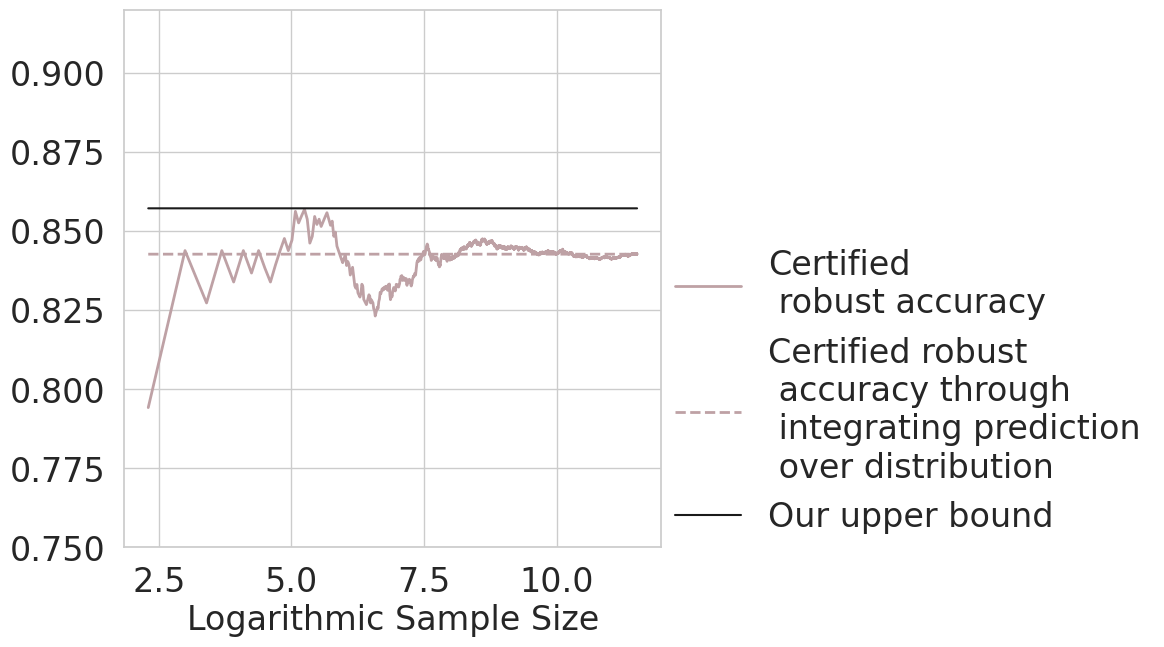

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.plot(np.log(np.arange(1, len(correct__) + 1) * n), avg_correct__00, label='Certified\n robust accuracy', color='#BEA1A5', linewidth=2)
plt.plot(np.log(np.arange(1, len(correct__) + 1) * n), distribution_correct, '--', label='Certified robust\n accuracy through\n integrating prediction\n over distribution', color='#BEA1A5', linewidth=2)
plt.plot(np.log(np.arange(1, len(correct__) + 1) * n), _zeta, label='Our upper bound', color='k')

plt.xlabel(r'Logarithmic Sample Size', fontsize=24)
ax.legend( fontsize=24, loc=(1,0.),ncol=1)
ax.tick_params(axis='both', which='major', labelsize=24)

ax.set_box_aspect(1)
ax.set_ylim(0.75, 0.92)

fig.tight_layout()

ind = np.random.randint(0,9999)
plt.savefig(f"convergence_2.pdf", bbox_inches='tight')
print(ind)

plt.show()

###Plot classifier and dataset

In [ ]:
import matplotlib.pyplot as plt

# Predict classes for the test set
with torch.no_grad():
    y_pred_test = model(X_test).round()

# Convert predictions and true labels to numpy arrays for easy comparison
y_pred_test = y_pred_test.numpy().ravel()
y_true_test = y_test.numpy().ravel()

# Determine correctly and incorrectly predicted examples in the test set
correct_test = y_pred_test == y_true_test
incorrect_test = ~correct_test

import numpy as np
mesh = np.c_[X1.ravel(), X2.ravel()]
mesh = torch.tensor(mesh, dtype=torch.float32)
with torch.no_grad():
    Z = model(mesh).round()
Z = Z.reshape(X1.shape)

# Plotting
plt.figure(figsize=(12, 8))

# Plot the decision boundary
plt.contourf(X1, X2, Z, alpha=0.8, cmap=plt.cm.Spectral)
plt.gca().set_box_aspect(1)

# Plot train data
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, edgecolors='k', label='Train Data', cmap=plt.cm.Spectral)

# Plot correctly predicted test data
plt.scatter(X_test[correct_test, 0], X_test[correct_test, 1], marker='^', c=y_true_test[correct_test], edgecolors='k', label='Correctly Predicted Test', cmap=plt.cm.Spectral)

# Plot incorrectly predicted test data
plt.scatter(X_test[incorrect_test, 0], X_test[incorrect_test, 1], marker='x', c=y_true_test[incorrect_test], edgecolors='k', label='Incorrectly Predicted Test', cmap=plt.cm.Spectral)

# Calculate Test Accuracy
correct_test_count = correct_test.sum()
test_accuracy = correct_test_count / len(y_true_test)

plt.title(f"Two Moons Dataset: Train/Test Split, Prediction Accuracy, and Decision Boundary\nTest Accuracy: {test_accuracy*100:.2f}%")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



In [ ]:
# Creating a contour plot with a gray color bar for both functions

import matplotlib.pyplot as plt

import numpy as np

# Creating a figure with two subplots
fig = plt.figure(figsize=(16, 4))

ax2 = fig.add_subplot(131)
ax2.set_box_aspect(1)
contour_Z1 = ax2.contourf(X1, X2, Z < 0.5, alpha=0.5, cmap='Reds')
contour_Z2 = ax2.contourf(X1, X2, W_p0 > W_p1, alpha=0.5, cmap='Blues')
ax2.set_xlabel('X1 axis')
ax2.set_ylabel('X2 axis')

beta = 1 - np.maximum(W_p0, W_p1).sum() * _d ** 2
ax2.set_title(f'Mean Absolute Error (MAE) {np.mean(np.abs(Z_p0 - W_p0)) + np.mean(np.abs(Z_p1 - W_p1)):.4f}')

# Create a legend
legend_handles = [plt.Rectangle((0, 0), 1, 1, fc='red', alpha=0.5), plt.Rectangle((0, 0), 1, 1, fc='blue', alpha=0.5)]
legend_labels = ['P(x|y=0)', 'P(x|y=1)']
ax2.legend(legend_handles, legend_labels)

# Creating a single colorbar in grayscale for both plots
sm = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []  # Fake data for ScalarMappable.
# cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation='vertical', pad=0.1)
cbar.set_label('Probability Density')

plt.subplots_adjust(wspace=0.3)

# Subplot 2: Contour plot
ax2 = fig.add_subplot(132)
ax2.set_box_aspect(1)
contour_Z1 = ax2.contourf(X1, X2, Z_p0 > Z_p1, alpha=0.5, cmap='Reds')
contour_Z2 = ax2.contourf(X1, X2,  Z < 0.5, alpha=0.5, cmap='Blues')
ax2.set_xlabel('X1 axis')
ax2.set_ylabel('X2 axis')

beta = 1 - np.maximum(W_p0, W_p1).sum() * _d ** 2
ax2.set_title(f'Mean Absolute Error (MAE) {np.mean(np.abs(Z_p0 - W_p0)) + np.mean(np.abs(Z_p1 - W_p1)):.4f}')

# Create a legend
legend_handles = [plt.Rectangle((0, 0), 1, 1, fc='red', alpha=0.5), plt.Rectangle((0, 0), 1, 1, fc='blue', alpha=0.5)]
legend_labels = ['P(x|y=0)', 'P(x|y=1)']
ax2.legend(legend_handles, legend_labels)

# Creating a single colorbar in grayscale for both plots
sm = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []  # Fake data for ScalarMappable.
# cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation='vertical', pad=0.1)
cbar.set_label('Probability Density')


ax2 = fig.add_subplot(133)
ax2.set_box_aspect(1)
contour_Z1 = ax2.contourf(X1, X2, Z_p0 > Z_p1, alpha=0.5, cmap='Reds')
contour_Z2 = ax2.contourf(X1, X2, W_p0 > W_p1, alpha=0.5, cmap='Blues')
ax2.set_xlabel('X1 axis')
ax2.set_ylabel('X2 axis')

beta = 1 - np.maximum(W_p0, W_p1).sum() * _d ** 2
ax2.set_title(f'Mean Absolute Error (MAE) {np.mean(np.abs(Z_p0 - W_p0)) + np.mean(np.abs(Z_p1 - W_p1)):.4f}')

# Create a legend
legend_handles = [plt.Rectangle((0, 0), 1, 1, fc='red', alpha=0.5), plt.Rectangle((0, 0), 1, 1, fc='blue', alpha=0.5)]
legend_labels = ['P(x|y=0)', 'P(x|y=1)']
ax2.legend(legend_handles, legend_labels)

# Creating a single colorbar in grayscale for both plots
sm = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []  # Fake data for ScalarMappable.
# cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation='vertical', pad=0.1)
cbar.set_label('Probability Density')

plt.show()

##Certified training

In [ ]:
from auto_LiRPA import BoundedModule, BoundedTensor
from auto_LiRPA.perturbations import PerturbationLpNorm

# Wrap the model
model = BoundedModule(model, torch.empty_like(X_train), bound_opts={"relu": "milp"})
model.eval()

# Define perturbations
eps = 0.1  # Specify the perturbation size
norm = float('inf')  # Specify the norm for perturbation (e.g., L-infinity)
ptb = PerturbationLpNorm(norm=norm, eps=eps)
input = BoundedTensor(X_test, ptb)

# Run the verification
lb, ub = model.compute_bounds(x=(input,), method="CROWN")

# Check if the bounds are within acceptable limits
# This depends on your specific application and requirements
threshold = 0.5

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

In [ ]:
def robust_loss_function(lb, ub, y_batch):
    # Loss for samples with label 1
    loss_positive = torch.nn.functional.binary_cross_entropy(lb, y_batch, reduction='none')
    loss_positive = torch.mean(loss_positive[y_batch == 1])

    # Loss for samples with label 0
    loss_negative = torch.nn.functional.binary_cross_entropy(ub, y_batch, reduction='none')
    loss_negative = torch.mean(loss_negative[y_batch == 0])

    # Combine the two losses
    total_loss = loss_positive + loss_negative
    return total_loss


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


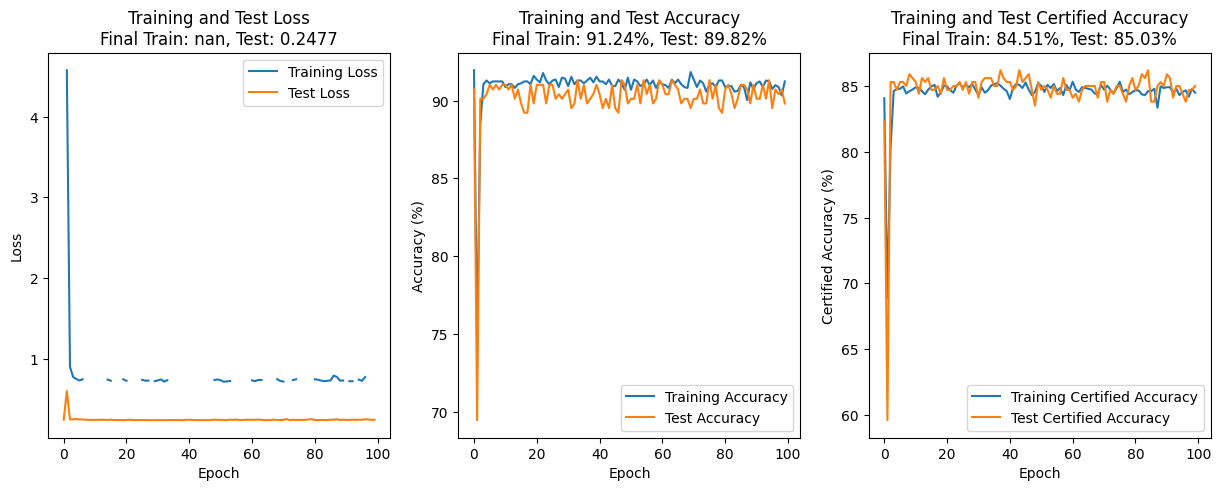

In [ ]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset
from auto_LiRPA import BoundedModule, BoundedTensor, PerturbationLpNorm

# Assuming model, criterion, optimizer, train_loader, X_test, y_test, ptb, and other necessary components are defined
# ...

# Initialize lists to track loss, accuracy, and certified accuracy
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []
train_cert_accuracies, test_cert_accuracies = [], []

epochs = 100
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    correct_certified = 0

    for X_batch, y_batch in train_loader:
        # Wrap input as a BoundedTensor
        X_batch_bounded = BoundedTensor(X_batch, ptb)

        # Compute bounds
        lb, ub = model.compute_bounds(x=(X_batch_bounded,), method="CROWN")

        # Compute a robust loss
        lb = torch.clamp(lb, 0, 1)
        ub = torch.clamp(ub, 0, 1)
        loss = robust_loss_function(lb, ub, y_batch)

        optimizer.zero_grad()
        outputs = model(X_batch)
        if epoch > 0:
            loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (outputs.round() == y_batch).float().sum()

        # Simplified certified accuracy computation for training data
        correct_lb = (y_batch == 1) & (lb > threshold)
        correct_ub = (y_batch == 0) & (ub < threshold)
        correct_certified += correct_lb.sum() + correct_ub.sum()

    train_losses.append(total_loss / len(train_loader))
    train_accuracies.append(100 * correct / len(train_loader.dataset))
    train_cert_accuracies.append(100 * correct_certified / len(train_loader.dataset))

    # Testing (validation with test data)
    model.eval()
    total_test_loss = 0
    correct_test = 0
    correct_certified_test = 0

    with torch.no_grad():
        test_outputs = model(X_test)
        total_test_loss = criterion(test_outputs, y_test).item()
        correct_test = (test_outputs.round() == y_test).float().sum()

        # Simplified certified accuracy computation for test data
        X_test_bounded = BoundedTensor(X_test, ptb)
        lb, ub = model.compute_bounds(x=(X_test_bounded,), method="CROWN")
        correct_lb_test = (y_test == 1) & (lb > threshold)
        correct_ub_test = (y_test == 0) & (ub < threshold)
        correct_certified_test = correct_lb_test.sum() + correct_ub_test.sum()

    test_losses.append(total_test_loss)
    test_accuracies.append(100 * correct_test / len(X_test))
    test_cert_accuracies.append(100 * correct_certified_test / len(X_test))

# Plotting
plt.figure(figsize=(15, 5))

# Plot Loss
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.title(f'Training and Test Loss\nFinal Train: {train_losses[-1]:.4f}, Test: {test_losses[-1]:.4f}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Standard Accuracy
plt.subplot(1, 3, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title(f'Training and Test Accuracy\nFinal Train: {train_accuracies[-1]:.2f}%, Test: {test_accuracies[-1]:.2f}%')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

# Plot Certified Accuracy
plt.subplot(1, 3, 3)
plt.plot(train_cert_accuracies, label='Training Certified Accuracy')
plt.plot(test_cert_accuracies, label='Test Certified Accuracy')
plt.title(f'Training and Test Certified Accuracy\nFinal Train: {train_cert_accuracies[-1]:.2f}%, Test: {test_cert_accuracies[-1]:.2f}%')
plt.xlabel('Epoch')
plt.ylabel('Certified Accuracy (%)')
plt.legend()

plt.show()


In [ ]:
# X1, X2 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

mesh = np.c_[X1.ravel(), X2.ravel()]
mesh = torch.tensor(mesh, dtype=torch.float32)
with torch.no_grad():
    Z = model(mesh.to('cuda' if torch.cuda.is_available() else 'cpu')).round()
Z = Z.reshape(X1.shape).cpu().numpy()

from scipy.integrate import simps

accuracy_values = np.vectorize(p0)(X1, X2) * (1 - Z) / 2 + np.vectorize(p1)(X1, X2) * Z / 2

integral_result = simps(simps(accuracy_values, np.linspace(-3, 3, 100), axis=0), np.linspace(-3, 3, 100))

print(f"Simpson's rule Integral Result: {integral_result:6f}, rough estimate: {accuracy_values.sum()* (X1[1,1]-X1[0,0])**2:6f}", )




Simpson's rule Integral Result: 0.895091, rough estimate: 0.894662


In [ ]:
with torch.no_grad():
    Z = model(mesh.to('cuda' if torch.cuda.is_available() else 'cpu')).round()
    mesh_bounded = BoundedTensor(mesh, ptb).to('cuda' if torch.cuda.is_available() else 'cpu')
    lb, ub = model.compute_bounds(x=(mesh_bounded,), method="CROWN")
    Z_bound = (lb > threshold) | (ub < threshold)

Z_bound = Z_bound.reshape(X1.shape).cpu().numpy()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# X1, X2 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

with torch.no_grad():
    Z = model(mesh.to('cuda' if torch.cuda.is_available() else 'cpu')).round()
    mesh_bounded = BoundedTensor(mesh, ptb).to('cuda' if torch.cuda.is_available() else 'cpu')
    lb, ub = model.compute_bounds(x=(mesh_bounded,), method="CROWN")
    Z_bound = (lb > threshold) | (ub < threshold)

Z_bound = Z_bound.reshape(X1.shape).cpu().numpy()
Z = Z.reshape(X1.shape).cpu().numpy()

from scipy.integrate import simps

accuracy_values = np.vectorize(p0)(X1, X2) * (1 - Z) * Z_bound / 2 + np.vectorize(p1)(X1, X2) * Z * Z_bound / 2

integral_result = simps(simps(accuracy_values, np.linspace(-3, 3, 100), axis=0), np.linspace(-3, 3, 100))

print(f"Simpson's rule Integral Result: {integral_result:6f}, rough estimate: {accuracy_values.sum()* (X1[1,1]-X1[0,0])**2:6f}", )




Simpson's rule Integral Result: 0.840874, rough estimate: 0.840619


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Sample data
# x_values = [1, 2, 3, 4, 5]
# y_values1 = [2, 4, 6, 8, 10]
# y_values2 = [1, 3, 5, 7, 9]

# # Set Seaborn style
# sns.set(style="whitegrid")
# sns.set_palette("viridis")  # Set a different color palette

# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(10, 6))

# # Plot the lines with markers
# sns.lineplot(x=x_values, y=y_values1, label='Line 1', marker='o', markersize=10, linestyle='-', linewidth=2)
# sns.lineplot(x=x_values, y=y_values2, label='Line 2', marker='s', markersize=10, linestyle='--', linewidth=2)

# # Fill the area between the lines
# ax.fill_between(x_values, y_values1, y_values2, color='lightgray', alpha=0.3)

# # Set plot title with a background color
# title = ax.set_title('Fancy Line Plot with Seaborn', fontsize=18, backgroundcolor='lightblue', pad=20)

# # Set axis labels
# ax.set_xlabel('X-axis Label', fontsize=14)
# ax.set_ylabel('Y-axis Label', fontsize=14)

# # Customize legend
# legend = ax.legend(fontsize=12, loc='upper left')
# legend.set_title('Legend', prop={'size': 14})

# # Add grid for better readability
# ax.grid(True, linestyle='--', alpha=0.7)

# # Customize tick parameters
# ax.tick_params(axis='both', which='major', labelsize=10)

# # Show the plot
# plt.show()


In [ ]:
# @title Faster version

from scipy.integrate import dblquad
from joblib import Parallel, delayed
import numpy as np


def accurate(x1, x2):
    with torch.no_grad():
        pred = model(torch.tensor([x1, x2])).round().item()
    return (p0(x1, x2) * (1 - pred) + p1(x1, x2) * pred) / 2

num_jobs = 16
x2_ranges = np.stack((np.linspace(-3, 3, num_jobs + 1)[:-1], np.linspace(-3, 3, num_jobs + 1)[1:]), axis=-1)

# Perform the double integration in parallel
# results = Parallel(n_jobs=num_jobs, backend='multiprocessing')(delayed(dblquad)(accurate, x2_range[0], x2_range[1], lambda x: x1_lower, lambda x: x1_upper) for x2_range in x2_ranges)

# Perform the double integration in parallel using 'multiprocessing'
def dblquad_wrapper(x2_range):
    return dblquad(accurate, x2_range[0], x2_range[1], lambda x: -3, lambda x: 3)

results = Parallel(n_jobs=num_jobs, backend='multiprocessing')(delayed(dblquad_wrapper)(r) for r in x2_ranges)


# Combine the results
total_result = sum(result[0] for result in results)

print("Result of the double integration:", total_result)
# print("Estimated error:", error)



0.8966056
0.8424872999999999


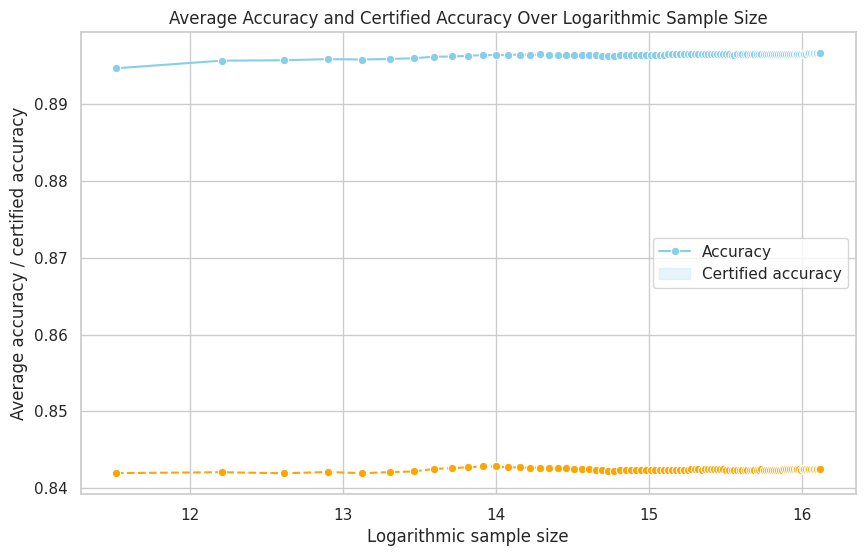

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")

correct__ = []
correct_certified__ = []

n = 100000
for k in range(100):
    X_, y_ = make_moons(n_samples=n, noise=0.3)
    X__ = torch.tensor(X_, dtype=torch.float32)
    y__ = torch.tensor(y_, dtype=torch.float32).view(-1, 1)

    with torch.no_grad():
        test_outputs = model(X__)
        correct_ = (test_outputs.round() == y__).float().sum()

        X__bounded = BoundedTensor(X_, ptb)
        lb, ub = model.compute_bounds(x=(X__bounded,), method="CROWN")
        correct_certified_ = ((y__ == 1) & (lb > threshold)).sum() + ((y__ == 0) & (ub < threshold)).sum()

    correct__.append(correct_)
    correct_certified__.append(correct_certified_)

avg_correct__ = np.cumsum(correct__) / np.arange(1, len(correct__) + 1) / n
avg_correct_certified__ = np.cumsum(correct_certified__) / np.arange(1, len(correct_certified__) + 1) / n

plt.figure(figsize=(10, 6))
sns.lineplot(x=np.log(np.arange(1, len(correct__) + 1) * n), y=avg_correct__, marker='o', linestyle='-', color='skyblue')
sns.lineplot(x=np.log(np.arange(1, len(correct_certified__) + 1) * n), y=avg_correct_certified__, marker='o', linestyle='--', color='orange')

# Label the axes
plt.xlabel('Logarithmic sample size')
plt.ylabel('Average accuracy / certified accuracy')
plt.legend(['Accuracy', 'Certified accuracy'])
plt.title('Average Accuracy and Certified Accuracy Over Logarithmic Sample Size')

print(avg_correct__[-1])
print(avg_correct_certified__[-1])
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import torch

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1.5, X[:, 1].max() + 1.5  # Extended more in the y-dimension
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Predict classes for each point in the meshgrid
mesh = np.c_[xx.ravel(), yy.ravel()]
mesh = torch.tensor(mesh, dtype=torch.float32)
with torch.no_grad():
    Z = model(mesh).round()
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(12, 8))

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)

# Assuming bounded_model, perturbation, and threshold are already defined
# ...

# Compute bounds for test data
test_data_bounded = BoundedTensor(X_test, ptb)
lb, ub = model.compute_bounds(x=(test_data_bounded,), method="CROWN")


# Predict classes for the test set
with torch.no_grad():
    y_pred_test = model(X_test).round()

# Convert predictions and true labels to numpy arrays for easy comparison
# y_pred_test = y_pred_test.numpy().ravel()
# y_true_test = y_test.numpy().ravel()

# Determine correctly and incorrectly predicted examples in the test set
correct = y_pred_test == y_test
# incorrect_test = ~correct_test

# Determine correctness and robustness for test data
robust = ((y_test == 1) & (lb > threshold)) | ((y_test == 0) & (ub < threshold))
correct_and_robust = correct & robust
correct_not_robust = correct & ~robust

# # Plotting
# plt.figure(figsize=(12, 8))

# Plot train data
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, edgecolors='k', label='Train Data', cmap=plt.cm.Spectral)

# Plot test data - Correct and Robust
plt.scatter(X_test[correct_and_robust.squeeze(), 0], X_test[correct_and_robust.squeeze(), 1], marker='^', color='green', edgecolors='k', label='Correct & Robust Test')

# Plot test data - Correct but not Robust
plt.scatter(X_test[correct_not_robust.squeeze(), 0], X_test[correct_not_robust.squeeze(), 1], marker='^', color='yellow', edgecolors='k', label='Correct but not Robust Test')

# Plot test data - Incorrect
plt.scatter(X_test[~correct.squeeze(), 0], X_test[~correct.squeeze(), 1], marker='x', color='red', edgecolors='k', label='Incorrect Test')

plt.title(f"Two Moons Dataset: Train/Test Split, Prediction Accuracy, Certified Robustness, and Decision Boundary\nTest Accuracy: {test_accuracies[-1]:.2f}%\nCertified Accuracy: {test_cert_accuracies[-1]:.2f}%")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Assume bounded_model is your model wrapped in BoundedModule
# and perturbation is defined as in your certified training setup

# Create meshgrid as before
# ...

# Convert mesh to PyTorch tensor
mesh_tensor = torch.tensor(mesh, dtype=torch.float32)

# Compute bounds for each point in the meshgrid
with torch.no_grad():
    mesh_bounded = BoundedTensor(mesh_tensor, ptb)
    lb, ub = model.compute_bounds(x=(mesh_bounded,), method="CROWN")

# Determine robustness for each point
# Assuming a binary classification with threshold 0.5
threshold = 0.5
robustness = (lb > threshold) | (ub < threshold)

# Reshape for plotting
robustness_plot = robustness.reshape(xx.shape)

# Plotting
plt.figure(figsize=(12, 8))

# Plot the robust regions
plt.contourf(xx, yy, robustness_plot, alpha=0.8, cmap=plt.cm.PiYG, levels=[0, 0.5, 1])

# [Add your existing plotting code for data points, decision boundary, etc.]

plt.title("Certified Robustness Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [ ]:
# @title Faster version

from scipy.integrate import dblquad
from joblib import Parallel, delayed
import numpy as np


def accurate(x1, x2):
    with torch.no_grad():
        pred = model(torch.tensor([x1, x2])).round().item()
    return (p0(x1, x2) * (1 - pred) + p1(x1, x2) * pred) / 2

num_jobs = 16
x2_ranges = np.stack((np.linspace(-3, 3, num_jobs + 1)[:-1], np.linspace(-3, 3, num_jobs + 1)[1:]), axis=-1)

# Perform the double integration in parallel
# results = Parallel(n_jobs=num_jobs, backend='multiprocessing')(delayed(dblquad)(accurate, x2_range[0], x2_range[1], lambda x: x1_lower, lambda x: x1_upper) for x2_range in x2_ranges)

# Perform the double integration in parallel using 'multiprocessing'
def dblquad_wrapper(x2_range):
    return dblquad(accurate, x2_range[0], x2_range[1], lambda x: -3, lambda x: 3)

results = Parallel(n_jobs=num_jobs, backend='multiprocessing')(delayed(dblquad_wrapper)(r) for r in x2_ranges)


# Combine the results
total_result = sum(result[0] for result in results)

print("Result of the double integration:", total_result)
# print("Estimated error:", error)



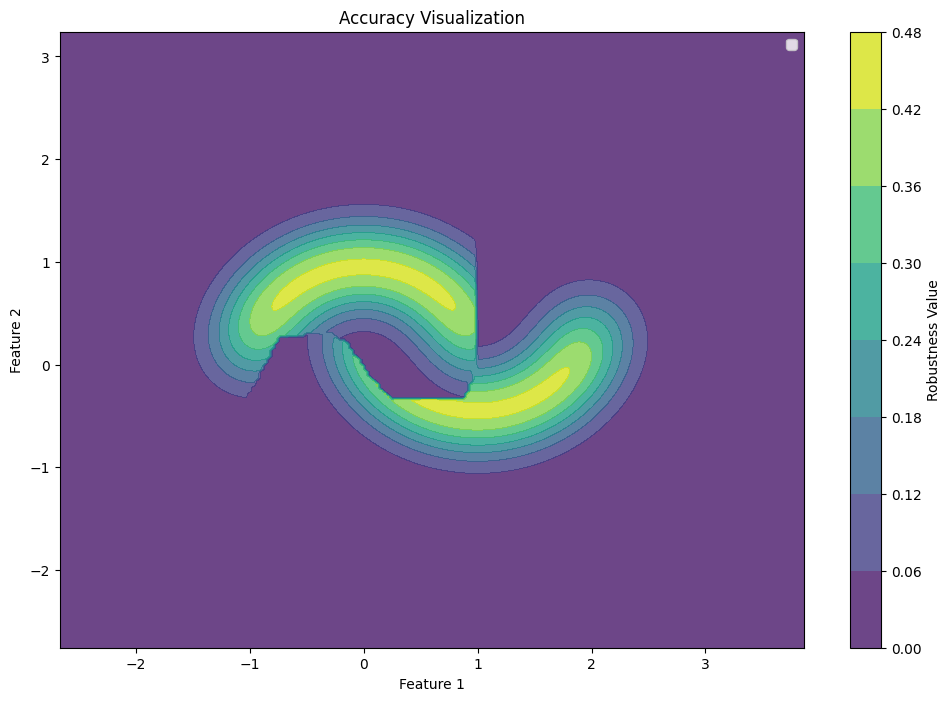

In [ ]:
plt.figure(figsize=(12, 8))

# Plot the robust regions
contour = plt.contourf(xx, yy, accu_plot, alpha=0.8)

# [Add your existing plotting code for data points, decision boundary, etc.]

# Add a colorbar
cbar = plt.colorbar(contour)
cbar.set_label("Robustness Value")

# Adjust the aspect ratio of the colorbar
aspect_ratio = 20  # Adjust this value to your preference
cax = cbar.ax
cax.set_aspect(aspect_ratio)

plt.title("Accuracy Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [ ]:
threshold = 0.5
robustness = (lb > threshold).squeeze() * p1_mesh + (ub < threshold).squeeze() * p0_mesh

# Reshape for plotting
robustness_plot = robustness.reshape(xx.shape)

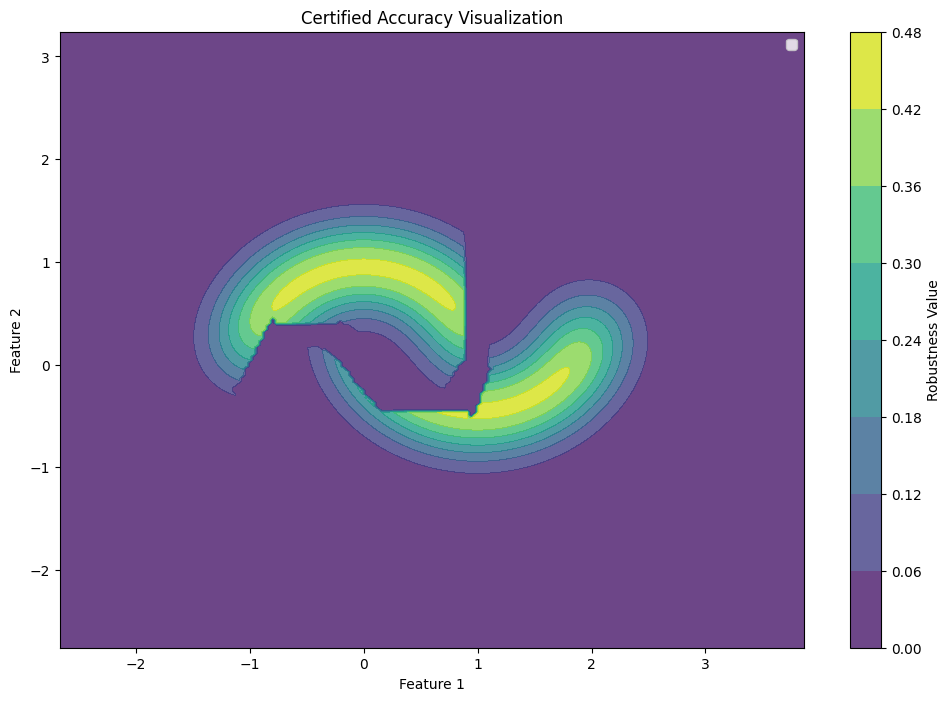

In [ ]:
plt.figure(figsize=(12, 8))

# Plot the robust regions
contour = plt.contourf(xx, yy, robustness_plot, alpha=0.8)

# [Add your existing plotting code for data points, decision boundary, etc.]

# Add a colorbar
cbar = plt.colorbar(contour)
cbar.set_label("Robustness Value")

# Adjust the aspect ratio of the colorbar
aspect_ratio = 20  # Adjust this value to your preference
cax = cbar.ax
cax.set_aspect(aspect_ratio)

plt.title("Certified Accuracy Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

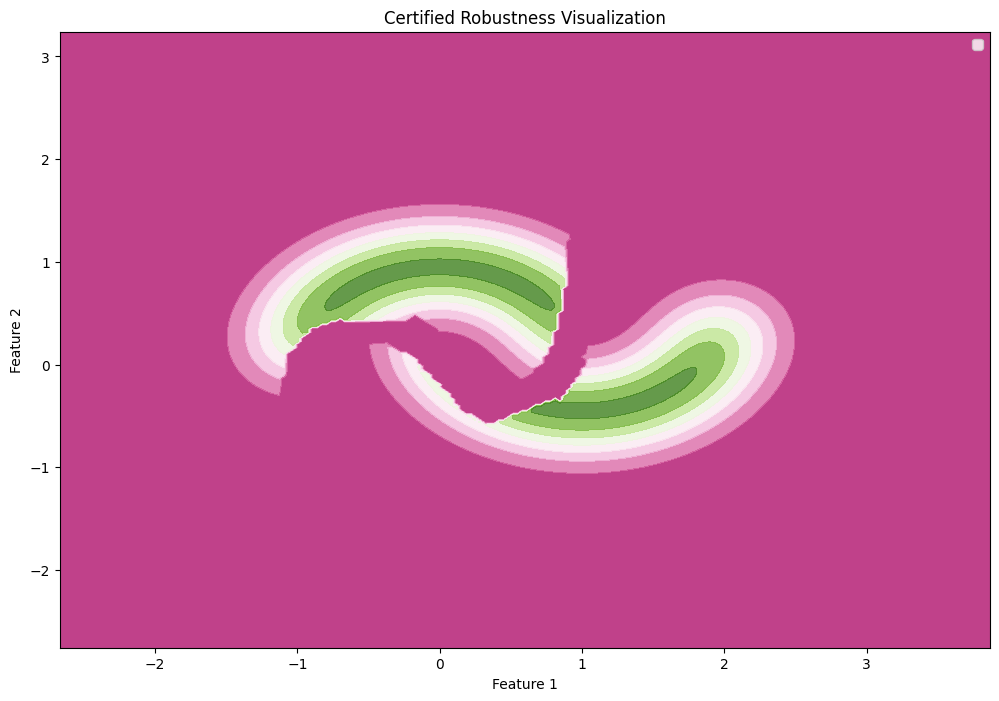

In [ ]:
# Plotting
plt.figure(figsize=(12, 8))

# Plot the robust regions
plt.contourf(xx, yy, robustness_plot, alpha=0.8, cmap=plt.cm.PiYG)

# [Add your existing plotting code for data points, decision boundary, etc.]

plt.title("Certified Robustness Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

kde = sns.kdeplot(x=X[y==0][:, 0], y=X[y==0][:, 1], cmap="Blues", fill=True, levels=10)


# Extract the data from the KDE plot
kde_data = kde.get_cmap().to_rgba(kde.get_array(), bytes=True)
kde_levels = kde.collections[0].get_paths()

# Now you have kde_data and kde_levels to work with
# kde_data contains the RGBA values for each point in the KDE plot
# kde_levels contains the paths of the contour levels

# For example, you can print the data of the first contour level
print("KDE Data (RGBA values):", kde_data[0])

# You can also iterate through the contour levels and print their paths
for i, level in enumerate(kde_levels):
    print(f"Contour Level {i + 1} Path: {level.vertices}")

plt.show()

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import make_moons


def find_points_within_distance_optimized(X, y, x, p_norm=2, distance_threshold=1):
    # Compute distances without flattening
    # distances = cdist(X, np.array([x]), metric='minkowski', p=p_norm)
    distances = cdist(X, np.array([x]), metric='chebyshev')


    # Use boolean indexing for efficient comparisons
    indices_within_distance = distances[:, 0] <= distance_threshold

    # Extract the points and corresponding labels using boolean indexing
    points_within_distance_X = X[indices_within_distance]
    corresponding_labels_y = y[indices_within_distance]

    return points_within_distance_X, corresponding_labels_y

# Example usage
n = 1000000
X, y = make_moons(n_samples=n, noise=0.3)
x = X[0]

p_norm = 2
distance_threshold = 0.1

result_X_opt, result_y_opt = find_points_within_distance_optimized(X, y, x, p_norm=p_norm, distance_threshold=distance_threshold)

print("Optimized - Points within distance:", result_X_opt)
print("Optimized - Corresponding labels:", result_y_opt)


Optimized - Points within distance: [[ 0.02961031  0.85052836]
 [ 0.02018063  0.78250385]
 [ 0.04976002  0.87776209]
 ...
 [ 0.05605127  0.86454121]
 [ 0.02188266  0.85213167]
 [-0.02962938  0.93670153]]
Optimized - Corresponding labels: [0 0 0 ... 0 0 1]


In [ ]:
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
X_.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1000000, 2)

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")

correct__ = []
neighbour_count = []

n = 1000000
for k in range(1):
    X, _ = make_moons(n_samples=10000, noise=0.3)
    X_, y_ = make_moons(n_samples=n, noise=0.3)
    for x_ in X:
        result_X_opt, result_y_opt = find_points_within_distance_optimized(X_, y_, x_, p_norm=p_norm, distance_threshold=distance_threshold)

        X__ = torch.tensor(result_X_opt, dtype=torch.float32).to('cuda' if torch.cuda.is_available() else 'cpu')
        y__ = torch.tensor(result_y_opt, dtype=torch.float32).view(-1, 1).to('cuda' if torch.cuda.is_available() else 'cpu')

        with torch.no_grad():
            test_outputs = model(X__)
            correct_ = (test_outputs.round() == y__).float().sum().item()

            # X__bounded = BoundedTensor(X_, ptb)
            # lb, ub = model.compute_bounds(x=(X__bounded,), method="CROWN")
            # correct_certified_ = ((y__ == 1) & (lb > threshold)).sum() + ((y__ == 0) & (ub < threshold)).sum()

        correct__.append(correct_)
        neighbour_count.append(len(y__))

# avg_correct__ = np.cumsum(correct__) / np.arange(1, len(correct__) + 1) / n
# avg_correct_certified__ = np.cumsum(correct_certified__) / np.arange(1, len(correct_certified__) + 1) / n

# plt.figure(figsize=(10, 6))
# sns.lineplot(x=np.log(np.arange(1, len(correct__) + 1) * n), y=avg_correct__, marker='o', linestyle='-', color='skyblue')
# sns.lineplot(x=np.log(np.arange(1, len(correct_certified__) + 1) * n), y=avg_correct_certified__, marker='o', linestyle='--', color='orange')

# # Label the axes
# plt.xlabel('Logarithmic sample size')
# plt.ylabel('Average accuracy / certified accuracy')
# plt.legend(['Accuracy', 'Certified accuracy'])
# plt.title('Average Accuracy and Certified Accuracy Over Logarithmic Sample Size')

# print(avg_correct__[-1])
# print(avg_correct_certified__[-1])
# plt.show()


In [ ]:
np.mean(correct__)

5580.9492

In [ ]:
np.mean(neighbour_count)

6246.312

In [ ]:
accuracies = np.array(correct__) / np.array(neighbour_count)
accuracies.mean()

<ipython-input-41-a9a8c43e12e4>:1: RuntimeWarning: invalid value encountered in divide
  accuracies = np.array(correct__) / np.array(neighbour_count)


nan

In [ ]:
(accuracies == 1).sum()/len(accuracies)

0.0675

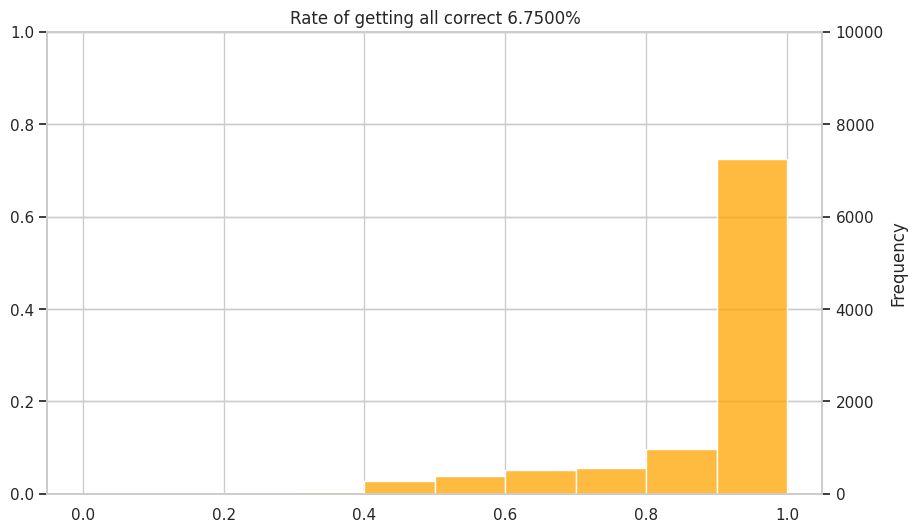

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

# Create a point plot for accuracies
fig, ax1 = plt.subplots(figsize=(10, 6))

# # sns.pointplot(x=range(1, len(neighbour_count) + 1), y=accuracies, color='skyblue', ax=ax1)
# ax1.set_xticks(range(len(neighbour_count)))
# ax1.set_xticklabels([f'A_{i}' for i in range(1, len(neighbour_count) + 1)])
# ax1.set_ylabel('Accuracy')
# ax1.set_title('Accuracy for Each Category')

# Create a histogram for accuracies
ax2 = ax1.twinx()
sns.histplot(accuracies, bins=np.linspace(0, 1, 11), kde=False, color='orange', ax=ax2)

ax2.set_ylabel('Frequency')
ax2.set_ylim(0, len(neighbour_count))
ax2.set_title(f'Rate of getting all correct {100*(accuracies == 1).sum()/len(accuracies):.4f}%')


plt.show()
